In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [2]:
index_cols=['location_id','sex_id','age_group_id']

age_group_ids = list(range(7,16))
sex_ids = [2]
coverage_levels = [0.2,0.5,0.8]
years = [2021,2022,2023,2024,2025]
location_ids = [163,179,214]

In [3]:
nutrient = 'iron'
vehicle = 'wheat flour'
effective_fractions = [1] * len(age_group_ids)

In [4]:
baseline_coverage, counterfactual_coverage = generate_overall_coverage_rates(
                                                     'temporary_coverage_data_3_3_21.csv',
                                                     nutrient, 
                                                     vehicle,
                                                     coverage_levels,
                                                     years,
                                                     location_ids,
                                                    ['women of reproductive age','total population',np.nan])

# HEMOGLOBIN

In [5]:
from scipy.stats import norm

# mean and 0.975-quantile of normal distribution for mean difference (MD)
mean = 3
q_975 = 6.1

# 0.975-quantile of standard normal distribution (=1.96, approximately)
q_975_stdnorm = norm().ppf(0.975)

std = (q_975 - mean) / q_975_stdnorm # std dev of normal distribution

# Frozen normal distribution for MD, representing uncertainty in our effect size
hb_md_distribution = norm(mean, std)

In [6]:
mean_difference_hemoglobin_fort = generate_normal_rr_deficiency_nofort_draws(mean, std, location_ids)
mean_difference_hemoglobin_fort.head()

draws,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,draw_104,draw_105,draw_106,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
location_id,,,,,,,,,,,,,,,,,,,,,
163,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
179,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852
214,5.67384,2.263045,2.010783,1.632669,3.592127,3.619293,0.71747,3.769218,2.099288,5.25659,...,2.68253,2.315703,4.976409,5.670455,1.949907,3.061148,3.881265,2.227427,2.005891,1.92852


In [7]:
effective_baseline_coverage = get_effective_iron_hemoglobin_coverage(baseline_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)
effective_counterfactual_coverage = get_effective_iron_hemoglobin_coverage(counterfactual_coverage, 
                                                                     sex_ids, 
                                                                     age_group_ids, 
                                                                     effective_fractions, 
                                                                     years)

delta_effective_coverage = effective_counterfactual_coverage - effective_baseline_coverage
delta_effective_coverage

draw_0    draw_1  \
location_id sex_id age_group_id year coverage_level                       
163         2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2            -0.009040 -0.011892   
                                     0.5            -0.005295 -0.006721   
...                                                       ...       ...   
214         2      15           2024 0.5             0.132185  0.131851   
                                     0.8             0.311628  0.311496   
                                2025 0.2            -0.047258 -0.047794   
                                     0.5             0.132185  0.131851   
                                     0.8             0.311628  0.311496   

                                                       draw_2    draw_3  \
location_id sex_id age_group_id year coverage_level                       
163         2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2            -0.012152 -0.013138   
                                     0.5            -0.006851 -0.007344   
...                                                       ...       ...   
214         2      15           2024 0.5             0.122230  0.139017   
                                     0.8             0.307693  0.314329   
                                2025 0.2            -0.063233 -0.036294   
                                     0.5             0.122230  0.139017   
                                     0.8             0.307693  0.314329   

                                                       draw_4    draw_5  \
location_id sex_id age_group_id year coverage_level                       
163         2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2            -0.013834 -0.009072   
                                     0.5            -0.007692 -0.005311   
...                                                       ...       ...   
214         2      15           2024 0.5             0.137463  0.138767   
                                     0.8             0.313715  0.314230   
                                2025 0.2            -0.038788 -0.036696   
                                     0.5             0.137463  0.138767   
                                     0.8             0.313715  0.314230   

                                                       draw_6    draw_7  \
location_id sex_id age_group_id year coverage_level                       
163         2      7            2021 0.2             0.000000  0.000000   
                                     0.5             0.000000  0.000000   
                                     0.8             0.000000  0.000000   
                                2022 0.2            -0.010665 -0.011588   
                                     0.5            -0.006107 -0.006569   
...                                                       ...       ...   
214         2      15           2024 0.5             0.127423  0.134453   
                                     0.8             0.309746  0.312525   
                                2025 0.2            -0.054901 -0.043618   
                                     0.5             0.127423  0.134453   
                                     0.8             0.309746  0.312525   

                                                       draw_8    draw_9  ...  \
location_id sex_id age_group_id year coverage_level                    

In [8]:
mean_hgb = generate_hemoglobin_values(delta_effective_coverage, 
                                      mean_difference_hemoglobin_fort,
                                      location_ids, age_group_ids, sex_ids)
mean_hgb.to_csv('mean_hgb_wra.csv')
mean_hgb

/ihme/homes/alibow/notebooks/vivarium_research_lsff/multiplication_models/iron_hemoglobin_functions.py:112: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  ignore_index=True)


draw_0  \
location_id sex_id age_group_id year_id coverage_level               
163         2      7            NaN     baseline        117.010288   
                   8            NaN     baseline        118.250651   
                   9            NaN     baseline        117.623860   
                   10           NaN     baseline        118.192074   
                   11           NaN     baseline        118.133772   
...                                                            ...   
214         2      15           2024.0  0.5             125.008670   
                                        0.8             126.026801   
                                2025.0  0.2             123.990539   
                                        0.5             125.008670   
                                        0.8             126.026801   

                                                            draw_1  \
location_id sex_id age_group_id year_id coverage_level               
163         2      7            NaN     baseline        118.180960   
                   8            NaN     baseline        118.263222   
                   9            NaN     baseline        117.229773   
                   10           NaN     baseline        118.613138   
                   11           NaN     baseline        118.357329   
...                                                            ...   
214         2      15           2024.0  0.5             127.977480   
                                        0.8             128.384025   
                                2025.0  0.2             127.570936   
                                        0.5             127.977480   
                                        0.8             128.384025   

                                                           draw_10  \
location_id sex_id age_group_id year_id coverage_level               
163         2      7            NaN     baseline        117.835650   
                   8            NaN     baseline        117.434865   
                   9            NaN     baseline        117.366309   
                   10           NaN     baseline        118.176368   
                   11           NaN     baseline        118.545886   
...                                                            ...   
214         2      15           2024.0  0.5             123.133525   
                                        0.8             123.499216   
                                2025.0  0.2             122.767834   
                                        0.5             123.133525   
                                        0.8             123.499216   

                                                          draw_100  \
location_id sex_id age_group_id year_id coverage_level               
163         2      7            NaN     baseline        117.237190   
                   8            NaN     baseline        118.585049   
                   9            NaN     baseline        117.024725   
                   10           NaN     baseline        117.493834   
                   11           NaN     baseline        117.737803   
...                                                            ...   
214         2      15           2024.0  0.5             119.167095   
                                        0.8             119.451694   
                                2025.0  0.2             118.882495   
                                        0.5             119.167095   
                                        0.8             119.451694   

                                                          draw_101  \
location_id sex_id age_group_id year_id coverage_level               
163         2      7            NaN     baseline        116.418528   
                   8            NaN     baseline        118.185030   
                   9            NaN     baseline        117.077667   
                   10           NaN     baseline        117.451161

In [9]:
hgb_sd = get_draws('modelable_entity_id',
                10488,
                source='epi',
                location_id=location_ids,
                age_group_id=age_group_ids,
                sex_id=sex_ids,
                year_id=2019,
                gbd_round_id=6,
                decomp_step='step4',
                status='best')
hgb_sd = (hgb_sd.set_index(['location_id','sex_id','age_group_id'])
 .filter([c for c in hgb_sd if 'draw' in c])
 .reset_index())
hgb_sd.to_csv('sd_hgb_wra.csv')
hgb_sd.head()

,location_id,sex_id,age_group_id,draw_0,draw_1,draw_10,draw_100,draw_101,draw_102,draw_103,...,draw_990,draw_991,draw_992,draw_993,draw_994,draw_995,draw_996,draw_997,draw_998,draw_999
0,163,2,7,16.232815,16.861857,17.807394,17.172007,16.530747,17.089487,16.817642,...,16.919322,16.875458,16.310396,17.531593,16.316476,17.139056,16.810648,16.063830,17.231543,16.826965
1,163,2,8,16.324923,16.303103,16.529796,16.555410,16.526651,16.943011,16.671821,...,16.670794,16.841863,17.213154,16.755587,17.587763,16.453598,16.550523,16.366658,16.726247,16.415682
2,163,2,9,16.339382,16.473878,16.764061,16.559954,16.782945,17.075298,16.684596,...,16.356952,16.753604,16.821949,17.264279,16.511237,16.657279,16.477109,16.886501,17.176739,17.207513
3,163,2,10,16.679102,17.005423,16.698849,16.826905,17.018209,16.937699,17.021107,...,16.642163,16.796351,16.571631,16.882139,16.933626,17.154732,16.925517,17.068923,16.659790,16.593173
4,163,2,11,17.083605,16.949877,16.535781,17.115116,16.018143,16.663800,16.447880,...,16.775011,17.228886,17.311730,16.705214,17.024880,16.824618,17.173916,17.055965,16.559953,17.320888


In [10]:
# get age-specific fertility rate
get_covariate_estimates(13, 
                               location_id=location_ids,
                               age_group_id=age_group_ids,
                               sex_id=sex_ids,
                               year_id=2019,
                               gbd_round_id=6,
                               decomp_step='step4').to_csv('asfr.csv')


# get still birth to live birth ratio (not age-specific)
still = get_covariate_estimates(2267, 
                                location_id=location_ids,
                                year_id=2019,
                                gbd_round_id=6,
                                decomp_step='step4').to_csv('still.csv')

In [11]:
# NOW RUN HEMOGLOBIN_TO_ANEMIA.R FILE BEFORE RUNNING NEXT CELL
assert "Did you run the R file?" == "Double check :)", "Make sure you run the R file!"

AssertionError: Make sure you run the R file!

In [12]:
anemia = load_anemia_prev_and_calculate_ylds('anemia_prev_wra.csv')
baseline_anemia = (duplicate_over_simulation_years(anemia.loc[anemia.coverage_level=='baseline'], years)
                   .drop(columns='coverage_level')
                   .set_index(['location_id','age_group_id','sex_id','year','draw']))
counterfactual_anemia = (anemia.loc[anemia.coverage_level != 'baseline']
                         .set_index(['location_id','age_group_id','sex_id','year','draw','coverage_level']))
averted_anemia = baseline_anemia - counterfactual_anemia
averted_anemia

mild  \
location_id age_group_id sex_id year draw     coverage_level             
163         7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.003211   
                                              0.8             0.008006   
                                     draw_999 0.2            -0.000666   
                                              0.5             0.001740   
                                              0.8             0.004176   

                                                              moderate  \
location_id age_group_id sex_id year draw     coverage_level             
163         7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.003006   
                                              0.8             0.007378   
                                     draw_999 0.2            -0.001451   
                                              0.5             0.003737   
                                              0.8             0.008844   

                                                                severe  \
location_id age_group_id sex_id year draw     coverage_level             
163         7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.000089   
                                              0.8             0.000218   
                                     draw_999 0.2            -0.000125   
                                              0.5             0.000318   
                                              0.8             0.000746   

                                                                anemic  \
location_id age_group_id sex_id year draw     coverage_level             
163         7            2      2021 draw_0   0.2             0.000000   
                                              0.5             0.000000   
                                              0.8             0.000000   
                                     draw_1   0.2             0.000000   
                                              0.5             0.000000   
...                                                                ...   
214         15           2      2025 draw_998 0.5             0.006306   
                                              0.8             0.015602   
                                     draw_999 0.2            -0.002241   
                                              0.5             0.005795   
                                              0.8             0.013766   

                                                              mild_ylds  \
location_id age_group_id sex_id year draw     coverage_level              
163         7            2      2021 draw_0   0.2              0

In [13]:
counts, rates = population_weight_values(averted_anemia.reset_index(), age_group_ids, sex_ids, location_ids)

In [14]:
counts = summarize_data(counts)
rates = summarize_data(rates)

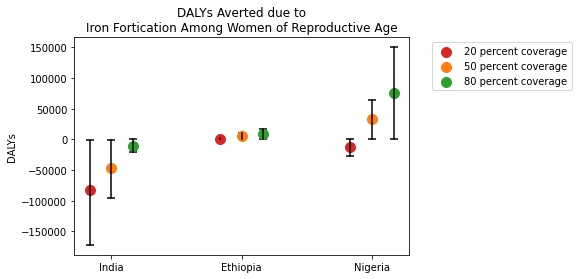

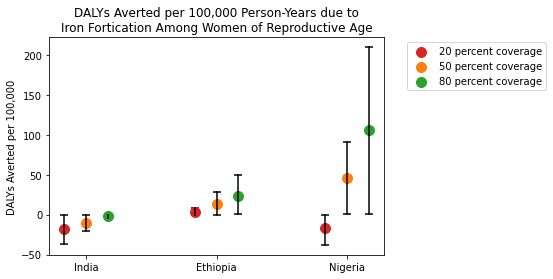

In [15]:
make_india_ethiopia_nigeria_plots(
    (counts.loc[counts.severity=='anemic']
     .loc[counts.measure=='ylds']
     .set_index(['location_id','year','coverage_level'])
     .drop(columns=['severity','measure'])), 
    'Iron', 
    'counts', 
    coverage_levels, True)

make_india_ethiopia_nigeria_plots(
    (rates.loc[rates.severity=='anemic']
     .loc[rates.measure=='ylds']
     .set_index(['location_id','year','coverage_level'])
     .drop(columns=['severity','measure'])), 
    'Iron', 
    'rates', 
    coverage_levels, True)

In [16]:
# need to incorporate iron responsive anemia PIF and plot
# need to load denominator and then divide counts... to be incorporated

# MATERNAL DISORDERS IMPACT TO BE ADDED ....